In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns




In [78]:
df = pd.read_csv('updated_ff_dataset.csv')

In [79]:
# Combine features into X
feature_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Classes']
X = df[feature_cols]  # Convert selected columns to NumPy array
# Alternative with np.column_stack:
# X = np.column_stack([df[col] for col in feature_cols])

# Set target y
y = df['FWI'] # Convert to NumPy array for consistency

In [80]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
def correlation(df, threshold):
    col_corr = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname= corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [82]:
corr_features = correlation(X_train, 0.85)

In [83]:
corr_features

{'BUI', 'DC', 'ISI'}

In [84]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape , X_test.shape

((97, 7), (25, 7))

In [85]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,1.0,6.0,2012.0,29.0,57.0,18.0,1.0,0
1,29,61,13,2.0,6.0,2012.0,29.0,61.0,13.0,2.0,0
2,26,82,22,3.0,6.0,2012.0,26.0,82.0,22.0,3.0,0
3,25,89,13,4.0,6.0,2012.0,25.0,89.0,13.0,4.0,0
4,27,77,16,5.0,6.0,2012.0,27.0,77.0,16.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...
117,31,54,11,26.0,9.0,2012.0,31.0,54.0,11.0,26.0,0
118,31,66,11,27.0,9.0,2012.0,31.0,66.0,11.0,27.0,1
119,32,47,14,28.0,9.0,2012.0,32.0,47.0,14.0,28.0,0
120,26,80,16,29.0,9.0,2012.0,26.0,80.0,16.0,29.0,0


In [86]:
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [87]:
X_train_Scaled

array([[ 0.84930818,  1.10652376, -0.32645878, -0.29063034, -0.49116201,
         0.        , -0.98974332],
       [-2.69404208,  0.6501768 ,  3.45975338, -0.1760322 ,  1.3066763 ,
         0.        , -0.98974332],
       [-2.69404208,  1.56287072, -0.32645878, -1.55120991,  1.3066763 ,
         0.        , -0.98974332],
       [ 1.14458737, -0.4450559 ,  0.70614454, -0.9782192 , -0.49116201,
         0.        , -0.98974332],
       [-0.33180857,  0.74144619, -0.32645878, -0.74902291,  1.3066763 ,
         0.        , -0.98974332],
       [-1.21764614,  1.38033193,  1.73874785, -0.29063034, -1.39008117,
         0.        , -0.98974332],
       [-0.62708776,  1.83667889, -1.01486099,  0.05316409, -1.39008117,
         0.        , -0.98974332],
       [ 1.14458737, -1.63155799, -1.01486099, -0.40522848,  0.40775714,
         0.        , -0.98974332],
       [ 0.2587498 , -0.62759468,  0.70614454,  0.85535108, -1.39008117,
         0.        ,  1.01036297],
       [-1.51292533,  1.1065

In [88]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

<Axes: >

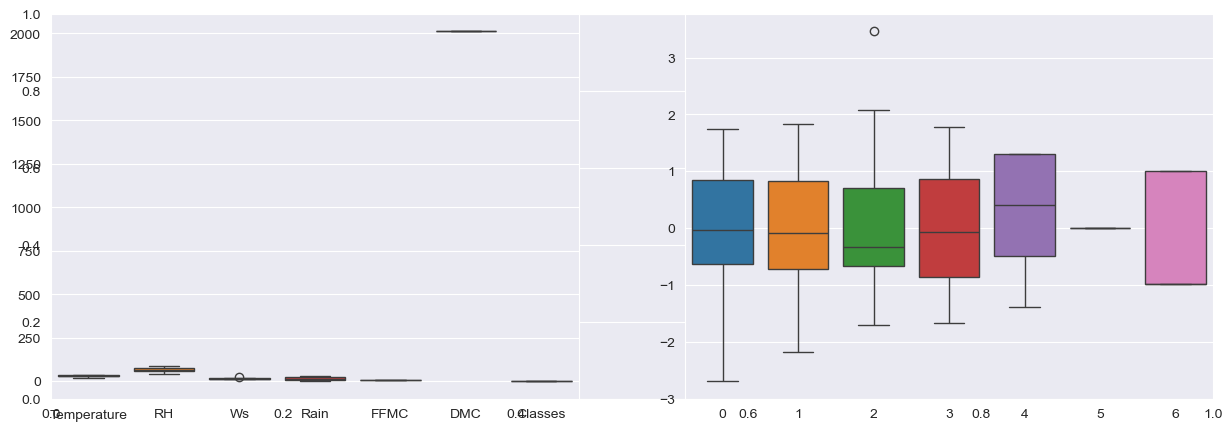

In [89]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_Scaled)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lin_reg = LinearRegression()
lin_reg.fit(X_train_Scaled, y_train)
y_pred = lin_reg.predict(X_test_Scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
mae , score


(1.8474111129762605e-15, 1.0)

In [92]:
import pickle

# Save the trained scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the trained model
with open('model.pkl', 'wb') as f:
    pickle.dump(lin_reg, f)

print("Scaler saved as 'scaler.pkl'")
print("Model saved as 'model.pkl'")

Scaler saved as 'scaler.pkl'
Model saved as 'model.pkl'
